In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

590

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
from config import weather_api_key
import requests
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | georgetown
Processing Record 2 of Set 12 | kapaa
Processing Record 3 of Set 12 | belaya gora
Processing Record 4 of Set 12 | kavaratti
Processing Record 5 of Set 12 | ambodifototra
City not found. Skipping...
Processing Record 6 of Set 12 | khatanga
Processing Record 7 of Set 12 | mahebourg
Processing Record 8 of Set 12 | ilulissat
Processing Record 9 of Set 12 | hermanus
Processing Record 10 of Set 12 | takoradi
Processing Record 11 of Set 12 | mataura
Processing Record 12 of Set 12 | atambua
Processing Record 13 of Set 12 | cape town
Processing Record 14 of Set 12 | ushuaia
Processing Record 15 of Set 12 | cayenne
Processing Record 16 of Set 12 | margate
Processing Record 17 of Set 12 | amderma
City not found. Skipping...
Processing Record 18 of Set 12 | punta arenas
Processing Record 19 of Set 12 | kieta
Processing Record 20 of Set 12 | roald
Processing Record 21 of Set 12 | rochester
Process

Processing Record 31 of Set 15 | lensk
Processing Record 32 of Set 15 | harper
Processing Record 33 of Set 15 | tasiilaq
Processing Record 34 of Set 15 | iqaluit
Processing Record 35 of Set 15 | broken hill
Processing Record 36 of Set 15 | east london
Processing Record 37 of Set 15 | edson
Processing Record 38 of Set 15 | illoqqortoormiut
City not found. Skipping...
Processing Record 39 of Set 15 | sentyabrskiy
City not found. Skipping...
Processing Record 40 of Set 15 | sistranda
Processing Record 41 of Set 15 | noshiro
Processing Record 42 of Set 15 | sao filipe
Processing Record 43 of Set 15 | tabou
Processing Record 44 of Set 15 | nishihara
Processing Record 45 of Set 15 | gaoua
Processing Record 46 of Set 15 | cross lanes
Processing Record 47 of Set 15 | ukiah
Processing Record 48 of Set 15 | atherton
Processing Record 49 of Set 15 | mitsamiouli
Processing Record 50 of Set 15 | port hardy
Processing Record 1 of Set 16 | danville
Processing Record 2 of Set 16 | kande
Processing Rec

Processing Record 15 of Set 19 | presidencia roque saenz pena
Processing Record 16 of Set 19 | toccoa
Processing Record 17 of Set 19 | makakilo city
Processing Record 18 of Set 19 | mujiayingzi
Processing Record 19 of Set 19 | halalo
City not found. Skipping...
Processing Record 20 of Set 19 | kemijarvi
Processing Record 21 of Set 19 | namtsy
Processing Record 22 of Set 19 | hillsborough
Processing Record 23 of Set 19 | sokoto
Processing Record 24 of Set 19 | poya
Processing Record 25 of Set 19 | acarau
Processing Record 26 of Set 19 | hobyo
Processing Record 27 of Set 19 | kilmallock
Processing Record 28 of Set 19 | kajaani
Processing Record 29 of Set 19 | bintulu
Processing Record 30 of Set 19 | luau
Processing Record 31 of Set 19 | yuryev-polskiy
Processing Record 32 of Set 19 | vao
Processing Record 33 of Set 19 | viedma
Processing Record 34 of Set 19 | mehamn
Processing Record 35 of Set 19 | glendive
Processing Record 36 of Set 19 | kardzhin
Processing Record 37 of Set 19 | ulaanb

Processing Record 3 of Set 23 | adrar
Processing Record 4 of Set 23 | medzilaborce
Processing Record 5 of Set 23 | touros
Processing Record 6 of Set 23 | xixiang
Processing Record 7 of Set 23 | dukat
Processing Record 8 of Set 23 | evensk
Processing Record 9 of Set 23 | aswan
Processing Record 10 of Set 23 | sur
Processing Record 11 of Set 23 | preobrazheniye
Processing Record 12 of Set 23 | paulo afonso
Processing Record 13 of Set 23 | ulladulla
Processing Record 14 of Set 23 | leningradskiy
Processing Record 15 of Set 23 | mayo
Processing Record 16 of Set 23 | beyneu
Processing Record 17 of Set 23 | maceio
Processing Record 18 of Set 23 | keelung
Processing Record 19 of Set 23 | monrovia
Processing Record 20 of Set 23 | viligili
City not found. Skipping...
Processing Record 21 of Set 23 | coruripe
Processing Record 22 of Set 23 | katobu
Processing Record 23 of Set 23 | pravia
Processing Record 24 of Set 23 | andra
Processing Record 25 of Set 23 | nalut
Processing Record 26 of Set 23 

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Georgetown,5.4112,100.3354,80.53,91,20,1.99,MY,2021-08-03 21:53:03
1,Kapaa,22.0752,-159.3190,84.18,81,47,1.01,US,2021-08-03 21:53:04
2,Belaya Gora,68.5333,146.4167,52.05,41,8,7.45,RU,2021-08-03 21:53:04
3,Kavaratti,10.5669,72.6420,81.84,76,77,16.37,IN,2021-08-03 21:53:05
4,Khatanga,71.9667,102.5000,66.87,61,97,8.52,RU,2021-08-03 21:53:05
5,Mahebourg,-20.4081,57.7000,70.09,68,20,10.36,MU,2021-08-03 21:53:05
6,Ilulissat,69.2167,-51.1000,42.57,80,35,0.27,GL,2021-08-03 21:53:06
7,Hermanus,-34.4187,19.2345,52.90,92,52,3.00,ZA,2021-08-03 21:53:06
8,Takoradi,4.8845,-1.7554,76.57,89,87,10.20,GH,2021-08-03 21:53:06
9,Mataura,-46.1927,168.8643,37.47,87,81,3.06,NZ,2021-08-03 21:53:07


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Georgetown,MY,2021-08-03 21:53:03,5.4112,100.3354,80.53,91,20,1.99
1,Kapaa,US,2021-08-03 21:53:04,22.0752,-159.3190,84.18,81,47,1.01
2,Belaya Gora,RU,2021-08-03 21:53:04,68.5333,146.4167,52.05,41,8,7.45
3,Kavaratti,IN,2021-08-03 21:53:05,10.5669,72.6420,81.84,76,77,16.37
4,Khatanga,RU,2021-08-03 21:53:05,71.9667,102.5000,66.87,61,97,8.52
...,...,...,...,...,...,...,...,...,...
537,Ayorou,NE,2021-08-03 21:56:17,14.7308,0.9174,96.04,34,38,2.98
538,Ondangwa,NA,2021-08-03 21:56:17,-17.9167,15.9500,64.40,36,0,3.44
539,Ola,RU,2021-08-03 21:56:18,59.5833,151.2833,55.51,51,2,10.74
540,Santos Dumont,BR,2021-08-03 21:56:18,-21.4567,-43.5525,61.77,87,83,7.18


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

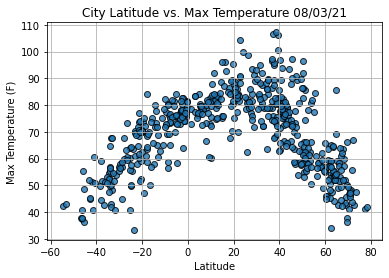

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

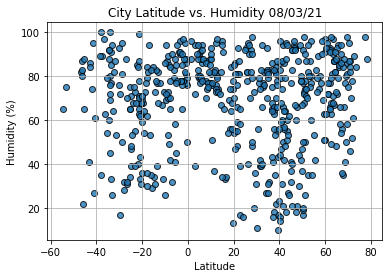

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

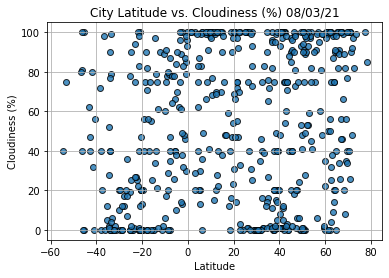

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

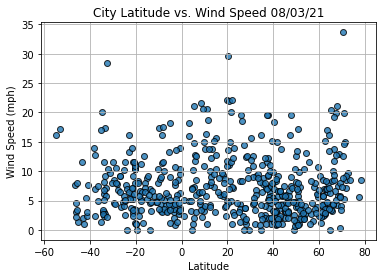

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Georgetown,MY,2021-08-03 21:53:03,5.4112,100.3354,80.53,91,20,1.99
1,Kapaa,US,2021-08-03 21:53:04,22.0752,-159.3190,84.18,81,47,1.01
2,Belaya Gora,RU,2021-08-03 21:53:04,68.5333,146.4167,52.05,41,8,7.45
3,Kavaratti,IN,2021-08-03 21:53:05,10.5669,72.6420,81.84,76,77,16.37
4,Khatanga,RU,2021-08-03 21:53:05,71.9667,102.5000,66.87,61,97,8.52


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

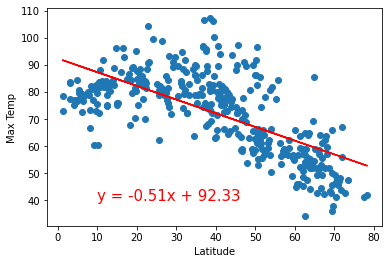

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

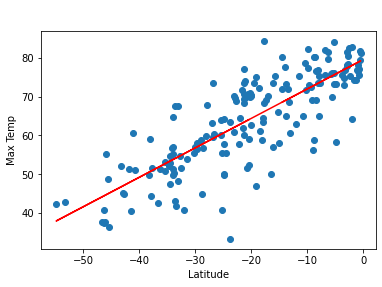

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

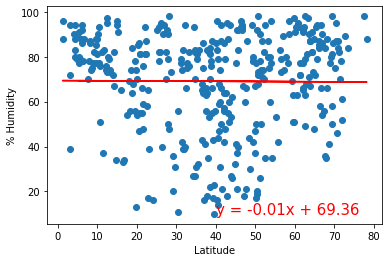

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

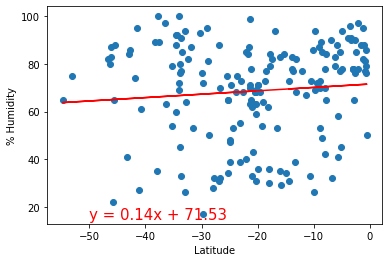

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

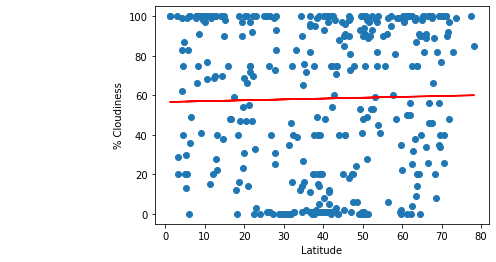

In [33]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-40,80))

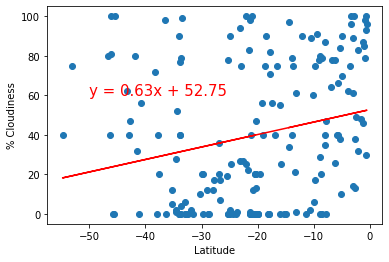

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

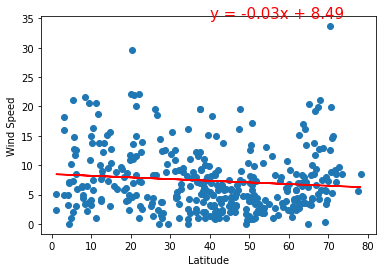

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

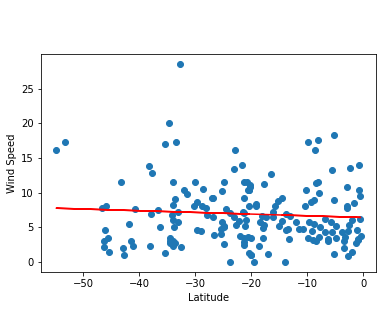

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))